<h1 style="text-align:center; color:#f7931a;">Bitcoin Price Prediction Notebook</h1>


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

<h2 style="color:#4d4d4d;"> 1. Introduction</h2>

In this project, we aim to predict the future prices of Bitcoin using historical price data. 
We will use machine learning techniques and time series analysis to build our prediction models.


<h2 style="color:#4d4d4d;"> 2. Data Collection and Preprocessing</h2>

In [8]:
# Load the dataset
url = "C:\\Users\\Asus\\Downloads\\bitstampUSD\\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv"
df = pd.read_csv(url)

In [9]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(4857377, 8)

In [12]:
# Convert the 'Timestamp' column to datetime format and set it as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [13]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
1970-01-01 00:00:01.325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1970-01-01 00:00:01.325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:01.325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:01.325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-01 00:00:01.325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2 style="color:#4d4d4d;">3. Exploratory Data Analysis (EDA)</h2>

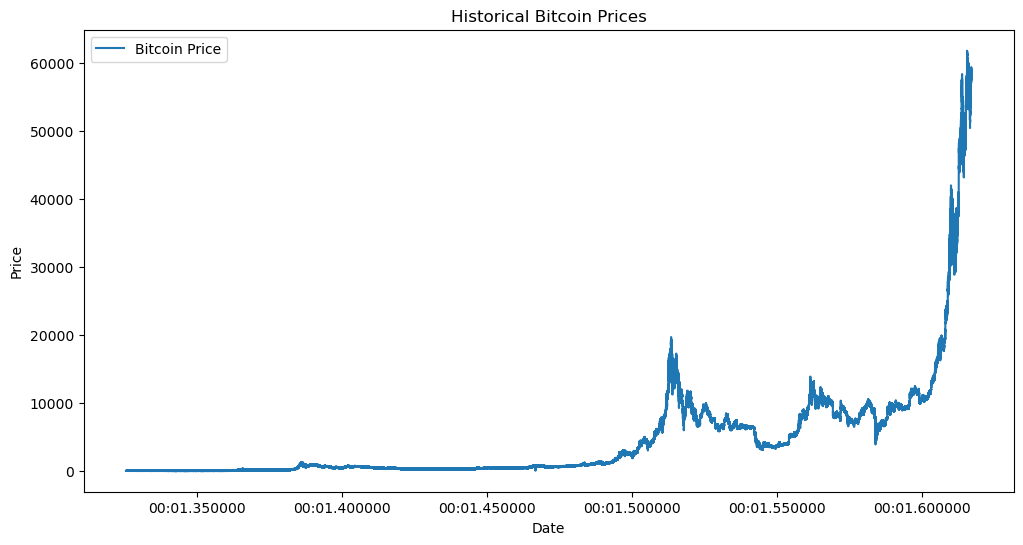

In [14]:
# Plot historical Bitcoin prices
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Bitcoin Price')
plt.title('Historical Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [15]:
# Display summary statistics
df.describe()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


<h2 style="color:#4d4d4d;">4. Feature Engineering</h2>

In [16]:
# Create lag features
df['Lag_1'] = df['Close'].shift(1)
df['Lag_7'] = df['Close'].shift(7)
df['Lag_30'] = df['Close'].shift(30)

In [17]:
# Drop rows with missing values
df.dropna(inplace=True)

In [18]:
# Prepare the features and target variable
X = df[['Lag_1', 'Lag_7', 'Lag_30']]
y = df['Close']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [20]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2 style="color:#4d4d4d;">5. Model Training and Evaluation</h2>

In [21]:
# Train an ARIMA model
model = ARIMA(y_train, order=(5, 1, 0))
model_fit = model.fit()

In [22]:
# Make predictions
y_pred = model_fit.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1, typ='levels')

In [23]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 18611.71464151625


<h2 style="color:#4d4d4d;"> 6. Prediction and Visualization</h2>

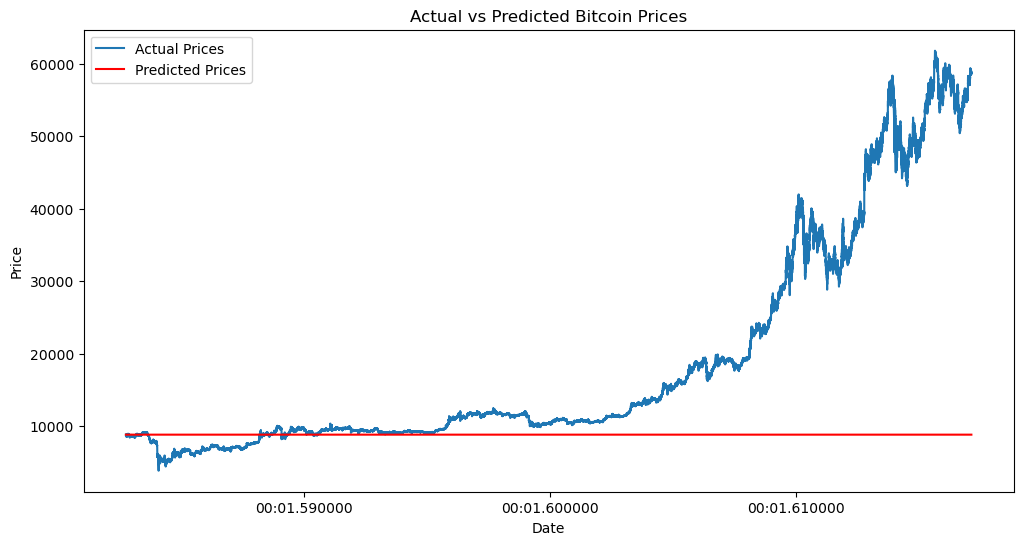

In [24]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

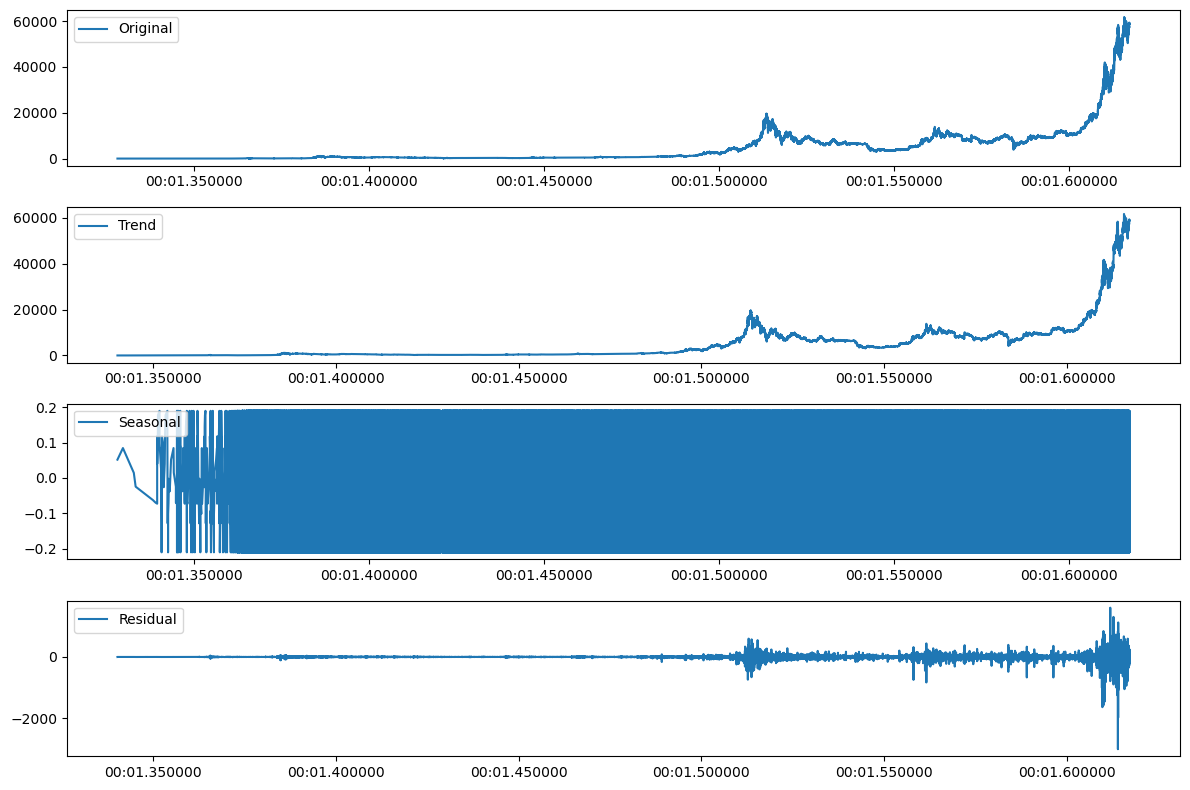

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Close'], model='additive', period=30)

# Plot decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df.index, decomposition.observed, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(df.index, decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(df.index, decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(df.index, decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<h2 style="color:#4d4d4d;"> 7. Conclusion</h2>
In this project, we successfully built a model to predict Bitcoin prices using historical data. 
We used an ARIMA model for time series forecasting and evaluated its performance using the RMSE metric.
Further improvements can be made by incorporating additional features and using more advanced models.
